In [76]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [123]:
# Pandas
pd.set_option('display.max_rows', 100)

# Matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update({'font.size': 18})


Generate Dataset

In [2]:
n_rows = 180

raw_data = pd.DataFrame({"Categories": ["".join(np.random.choice(list("AB"), size=2)) for _ in range(n_rows)]}
                        ,index=pd.date_range(start='1/1/2018', periods=n_rows, freq='D'))

data = raw_data["Categories"].groupby(pd.Grouper(freq="M")).value_counts().to_frame("Volume")
data["Probability"] = raw_data["Categories"].groupby(pd.Grouper(freq="M")).value_counts(normalize=True)
data.reset_index(inplace=True)
data.rename(columns={'level_0': "Dates"}, inplace=True)
data["Dates"] = data["Dates"].dt.date

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


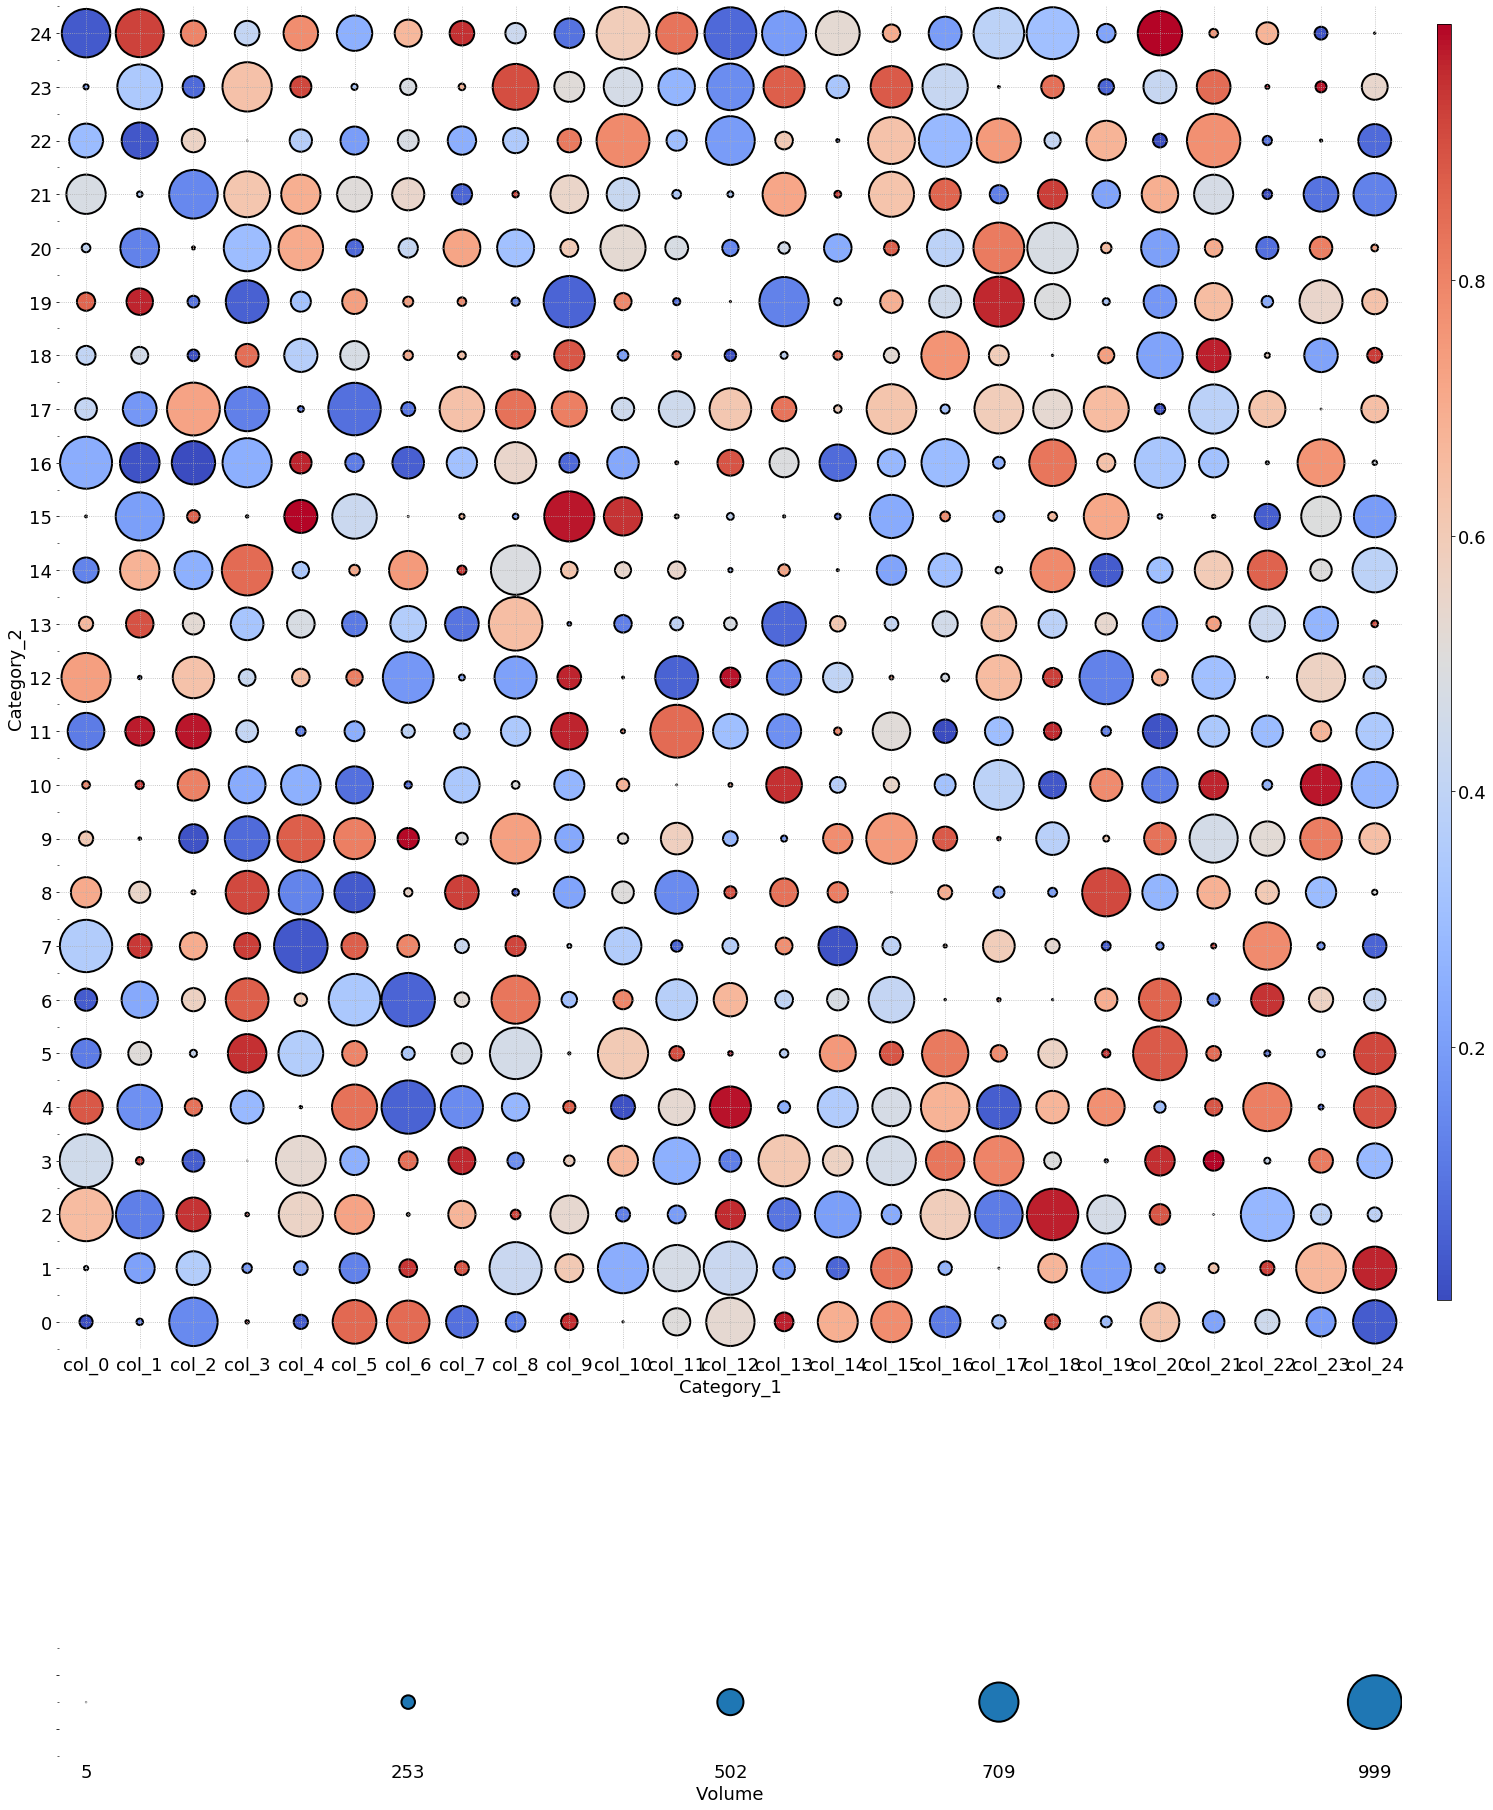

In [215]:
#srcs: https://blogs.oii.ox.ac.uk/bright/2014/08/12/point-size-legends-in-matplotlib-and-basemap-plots/
from itertools import zip_longest 
# Setup Grid and Values

nrows = 25
ncols = 25

volume = pd.DataFrame(np.random.randint(0, 1000, size=(nrows, ncols)), columns=[f"col_{i}" for i in range(ncols)])
probabilities = pd.DataFrame(np.random.rand(nrows, ncols), columns=[f"col_{i}" for i in range(ncols)])

def heatmap_4d(volume, probabilities, xlabel="xlabel", ylabel="ylabel", figsize=(20, 30), ncircles=10):

    # Get Labels
    ylabels = volume.index
    xlabels = volume.columns.values
    x, y = np.meshgrid(np.arange(xlabels.shape[0]), np.arange(ylabels.shape[0]))

    volume = volume.values
    probabilities = probabilities.values

    # Start figure setup
    fig, (heatmap, legend) = plt.subplots(figsize=figsize, nrows=2
                                          ,squeeze=True
                                          ,gridspec_kw={'height_ratios': [1, 0.25]}
                                          )
    
    radii_list = volume/volume.max()/2
    circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(radii_list.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=probabilities.flatten(), cmap='coolwarm', edgecolors='k', linewidth=2)
    heatmap.add_collection(col)

    heatmap.set(xticks=np.arange(xlabels.shape[0]), yticks=np.arange(ylabels.shape[0])
               ,xticklabels=xlabels, yticklabels=ylabels)

    heatmap.set_xticks(np.arange(xlabels.shape[0]+1)-0.5, minor=True)
    heatmap.set_yticks(np.arange(ylabels.shape[0]+1)-0.5, minor=True)
    heatmap.grid(which='major', linestyle=":")
    heatmap.set_ylabel(ylabel)
    heatmap.set_xlabel(xlabel)

    heatmap.axes.set_aspect('equal')

    # Legend
    
    leg_xticks = np.arange(xlabels.shape[0])
    leg_yticks = range(2)
    
    min_volume = min([volume for volume in volume.flatten() if volume>0])
    
    leg_xticklabels = np.linspace(min_volume, max(volume.flatten()), len(leg_xticks), dtype=int)
    leg_yticklabels = [0, 1]
        
    leg_radii_list = list(np.percentile(radii_list.flatten(), [25, 50, 75]))
    leg_radii_list.extend([min(radii_list.flatten()), max(radii_list.flatten())])
    leg_radii_list = sorted(leg_radii_list)
    
    leg_vol_idx = dict(zip_longest(leg_xticklabels, leg_xticks))
    leg_vol_stats = list(np.percentile(volume.flatten(), [25, 50, 75]))
    leg_vol_stats.extend([min_volume, max(volume.flatten())])
    leg_vol_list = [leg_xticklabels[(np.abs(leg_xticklabels - volume)).argmin()] for volume in leg_vol_stats]
    
    leg_circle_pos = [leg_vol_idx[item] for item in leg_vol_list]
    leg_circle_pos = sorted(leg_circle_pos)
    
    legend_circles = [plt.Circle((i, 0.5), radius=r) for r, i in zip(leg_radii_list, leg_circle_pos)]
    legend_col = PatchCollection(legend_circles, edgecolors='k', linewidth=2)
    legend.add_collection(legend_col)


    xlabels = [label if label in leg_vol_list else "" for label in leg_xticklabels]
    legend.set(xticks=leg_xticks, yticks=leg_yticks, xticklabels=xlabels, yticklabels=[])
    legend.set_xticks(np.arange(len(leg_xticklabels)+1)-0.5, minor=True)
    legend.set_yticks(np.arange(len(leg_yticklabels)+1)-0.5, minor=True)

    legend.set_xlabel("Volume")
    legend.axes.set_aspect('equal')
#     legend.grid(which='major', linestyle=":")

    axins = inset_axes(heatmap, width="1%", height="95%", loc='upper right', bbox_to_anchor=(0.05, 0., 1, 1), bbox_transform=heatmap.transAxes, borderpad=1)
    fig.colorbar(col, cax=axins)
    
    fig.tight_layout()
    
    return heatmap, legend

heatmap, _ = heatmap_4d(volume, probabilities, xlabel="Category_1", ylabel="Category_2", ncircles=10)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


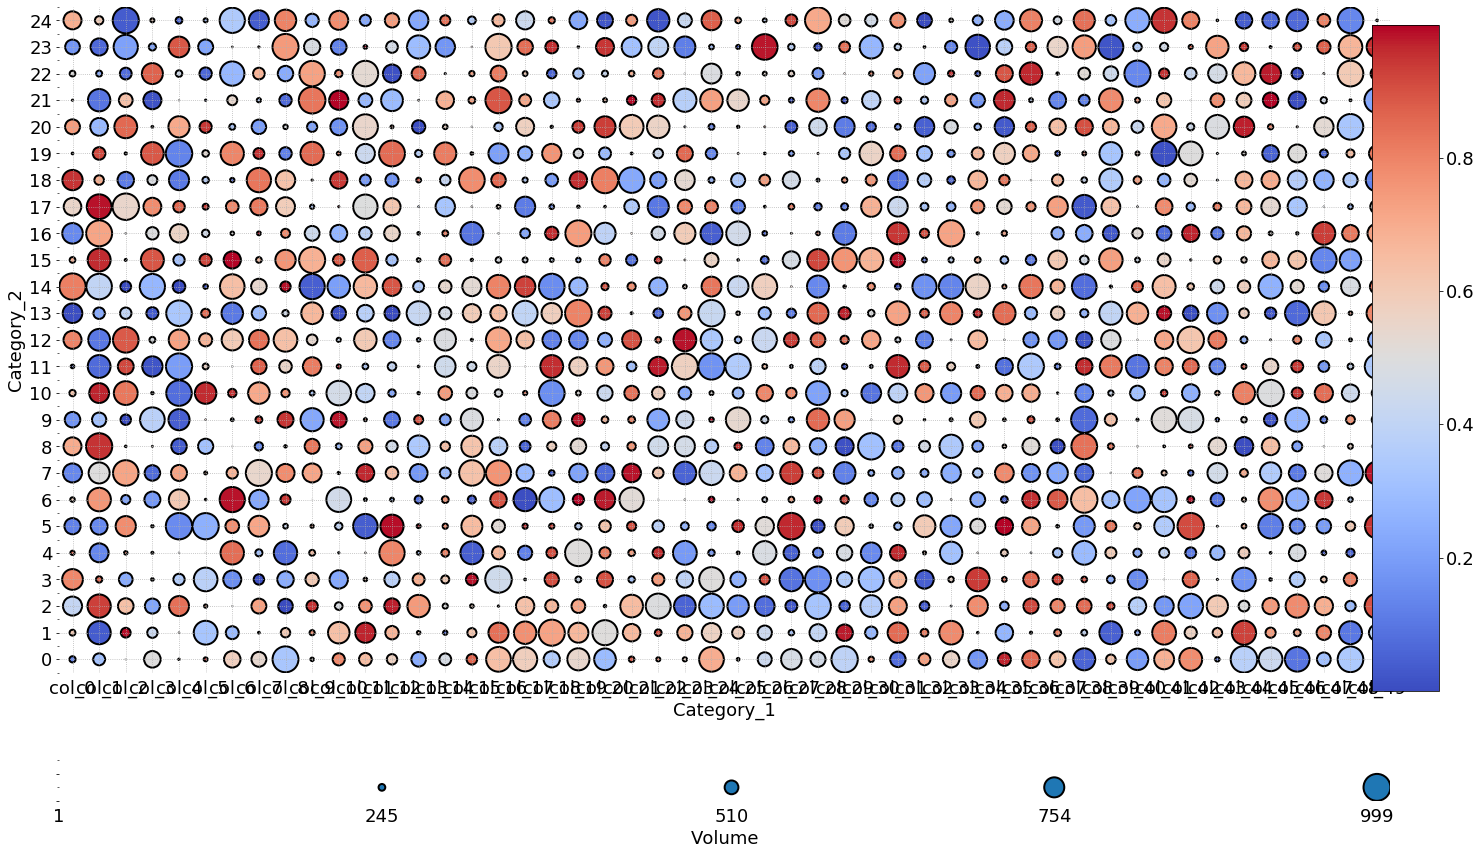

In [217]:
#srcs: https://blogs.oii.ox.ac.uk/bright/2014/08/12/point-size-legends-in-matplotlib-and-basemap-plots/
from itertools import zip_longest 
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
# Setup Grid and Values

nrows = 25
ncols = 50

volume = pd.DataFrame(np.random.randint(0, 1000, size=(nrows, ncols)), columns=[f"col_{i}" for i in range(ncols)])
probabilities = pd.DataFrame(np.random.rand(nrows, ncols), columns=[f"col_{i}" for i in range(ncols)])

def heatmap_4d(volume, probabilities, xlabel="xlabel", ylabel="ylabel", figsize=(20, 30), ncircles=10):

    # Get Labels
    ylabels = volume.index
    xlabels = volume.columns.values
    x, y = np.meshgrid(np.arange(xlabels.shape[0]), np.arange(ylabels.shape[0]))

    volume = volume.values
    probabilities = probabilities.values

    # Start figure setup
    fig, heatmap = plt.subplots(figsize=figsize)
    
    divider = make_axes_locatable(heatmap)
    
    legend = divider.append_axes("bottom", size=1, pad=1)
    
    radii_list = volume/volume.max()/2
    circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(radii_list.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=probabilities.flatten(), cmap='coolwarm', edgecolors='k', linewidth=2)
    heatmap.add_collection(col)

    heatmap.set(xticks=np.arange(xlabels.shape[0]), yticks=np.arange(ylabels.shape[0])
               ,xticklabels=xlabels, yticklabels=ylabels)

    heatmap.set_xticks(np.arange(xlabels.shape[0]+1)-0.5, minor=True)
    heatmap.set_yticks(np.arange(ylabels.shape[0]+1)-0.5, minor=True)
    heatmap.grid(which='major', linestyle=":")
    heatmap.set_ylabel(ylabel)
    heatmap.set_xlabel(xlabel)

    heatmap.axes.set_aspect('equal')

    # Legend
    
    leg_xticks = np.arange(xlabels.shape[0])
    leg_yticks = range(2)
    
    min_volume = min([volume for volume in volume.flatten() if volume>0])
    
    leg_xticklabels = np.linspace(min_volume, max(volume.flatten()), len(leg_xticks), dtype=int)
    leg_yticklabels = [0, 1]
        
    leg_radii_list = list(np.percentile(radii_list.flatten(), [25, 50, 75]))
    leg_radii_list.extend([min(radii_list.flatten()), max(radii_list.flatten())])
    leg_radii_list = sorted(leg_radii_list)
    
    leg_vol_idx = dict(zip_longest(leg_xticklabels, leg_xticks))
    leg_vol_stats = list(np.percentile(volume.flatten(), [25, 50, 75]))
    leg_vol_stats.extend([min_volume, max(volume.flatten())])
    leg_vol_list = [leg_xticklabels[(np.abs(leg_xticklabels - volume)).argmin()] for volume in leg_vol_stats]
    
    leg_circle_pos = [leg_vol_idx[item] for item in leg_vol_list]
    leg_circle_pos = sorted(leg_circle_pos)
    
    legend_circles = [plt.Circle((i, 0.5), radius=r) for r, i in zip(leg_radii_list, leg_circle_pos)]
    legend_col = PatchCollection(legend_circles, edgecolors='k', linewidth=2)
    legend.add_collection(legend_col)


    xlabels = [label if label in leg_vol_list else "" for label in leg_xticklabels]
    legend.set(xticks=leg_xticks, yticks=leg_yticks, xticklabels=xlabels, yticklabels=[])
    legend.set_xticks(np.arange(len(leg_xticklabels))+0.5, minor=True)
    legend.set_yticks(np.arange(len(leg_yticklabels))+0.5, minor=True)

    legend.set_xlabel("Volume")
    legend.axes.set_aspect('equal')
#     legend.grid(which='major', linestyle=":")

    axins = inset_axes(heatmap, width="5%", height="100%", loc='upper right', bbox_to_anchor=(0.05, 0., 1, 1), bbox_transform=heatmap.transAxes, borderpad=1)
    fig.colorbar(col, cax=axins)
    
    fig.tight_layout()
    
    return heatmap, legend

heatmap, _ = heatmap_4d(volume, probabilities, xlabel="Category_1", ylabel="Category_2", ncircles=10)


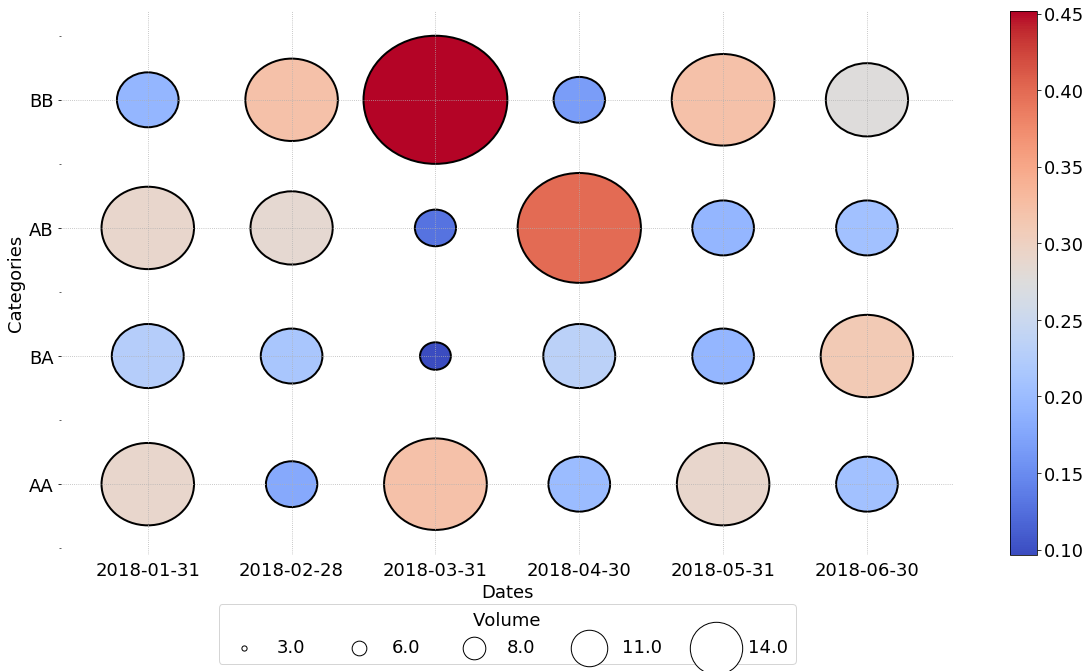

In [5]:

#srcs: https://blogs.oii.ox.ac.uk/bright/2014/08/12/point-size-legends-in-matplotlib-and-basemap-plots/

legend_points = 5

# Get Labels
ylabels = data["Categories"].drop_duplicates()
xlabels = data["Dates"].drop_duplicates()

# Setup Grid and Values
x, y = np.meshgrid(np.arange(xlabels.shape[0]), np.arange(ylabels.shape[0]))
volume = data.pivot(index="Categories", columns="Dates", values="Volume").values #np.random.randint(0, 180, size=(data.shape[0], data.shape[1]))
probabilities = data.pivot(index="Categories", columns="Dates", values="Probability").values

# Start figure setup
fig, heatmap = plt.subplots()
radii_list = volume/volume.max()/2
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(radii_list.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=probabilities.flatten(), cmap='coolwarm', edgecolors='k', linewidth=2)
heatmap.add_collection(col)

heatmap.set(xticks=np.arange(xlabels.shape[0]), yticks=np.arange(ylabels.shape[0])
           ,xticklabels=xlabels, yticklabels=ylabels)

heatmap.set_xticks(np.arange(xlabels.shape[0]+1)-0.5, minor=True)
heatmap.set_yticks(np.arange(ylabels.shape[0]+1)-0.5, minor=True)
heatmap.grid(which='major', linestyle=":")
heatmap.set_ylabel("Categories")
heatmap.set_xlabel("Dates")

handles_labels_map = {label: heatmap.scatter([], [], s=label**3, edgecolors='black', color="white") 
                      for label in [round(x) for x in np.linspace(volume.min(), volume.max(), legend_points)]}

handles =  list(handles_labels_map.values())
labels = list(handles_labels_map.keys())
plt.legend(handles, labels, title='Volume', scatterpoints=1, ncol=legend_points
          ,loc='upper center', bbox_to_anchor=(0.5, -0.075),
          fancybox=True)

fig.colorbar(col)